# Analiza podatkov mang

Tukaj bom analiziral podatke, ki sem jih pridobil iz spletne strani https://myanimelist.net/topmanga.php. Za vsako mango sem našel: rank, naslov, ocena, število delov, popularnost, žanri in revija.

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [19]:
podatki_obdelani = 'csv_datoteke'
csv1 = 'manga_info.csv'
pot1 = os.path.join(podatki_obdelani, csv1)

pd.set_option("display.max_rows", 12)

mange1 = pd.read_csv(pot1)
mange1.index += 1

In [20]:
mange1

,rank,naslov,ocena,deli
1,1,Berserk,9.47,Ni končana
2,2,JoJo no Kimyou na Bouken Part 7: Steel Ball Run,9.31,24
3,3,Vagabond,9.26,37
4,4,One Piece,9.22,Ni končana
5,5,Monster,9.16,18
...,...,...,...,...
1496,1496,Running on Empty,7.75,2
1497,1497,Amanchu!,7.75,17
1498,1498,Not Simple,7.75,1
1499,1499,Yakusoku Siren,7.75,Ni končana


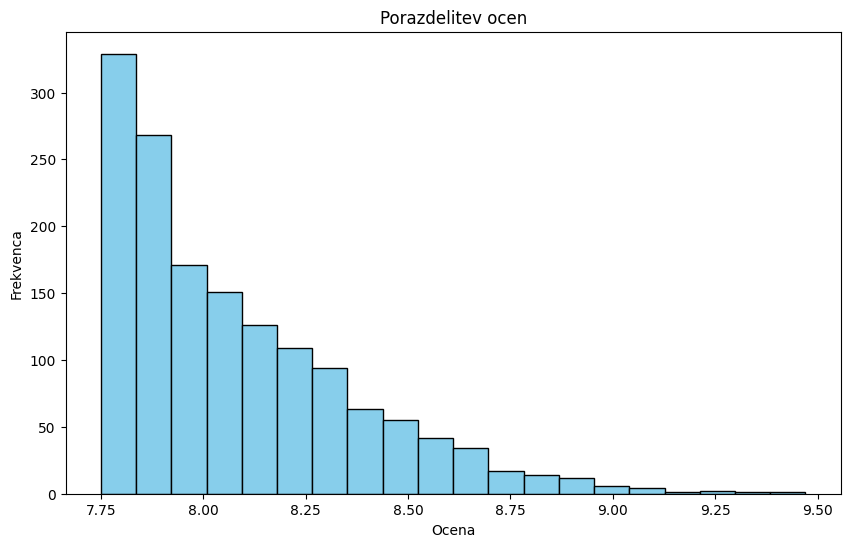

In [21]:
plt.figure(figsize=(10, 6))
mange1['ocena'].hist(bins=20, color='skyblue', edgecolor='black')
plt.title('Porazdelitev ocen')
plt.xlabel('Ocena')
plt.ylabel('Frekvenca')
plt.grid(False)
plt.show()

Najdimo zdaj vse mange, ki spadajo v žaner "Drama".

In [25]:
data = []
csv2 = 'manga_info2.csv'
pot2 = os.path.join(podatki_obdelani, csv2)
mange2 = pd.read_csv(pot2)
for index, vrstica in mange2.iterrows():
    if 'Drama' in vrstica['seznam_zanrov']:
        data.append(vrstica)
mange3 = pd.DataFrame(data=data, index=range(1, len(data) + 1))
mange3

,rank,naslov,ocena,deli,popularnost,seznam_zanrov,revija
1,1,Berserk,9.47,Ni končana,1,"['Action', 'Adventure', 'Award Winning', 'Dram...",Young Animal
2,5,Monster,9.16,18,29,"['Award Winning', 'Drama', 'Mystery']",Big Comic Original
3,7,Vinland Saga,9.08,Ni končana,18,"['Action', 'Adventure', 'Award Winning', 'Drama']",Afternoon
4,10,Fullmetal Alchemist,9.04,27,20,"['Action', 'Adventure', 'Award Winning', 'Dram...",Shounen Gangan
5,14,Oyasumi Punpun,9.00,13,8,"['Drama', 'Slice of Life']",Big Comic Spirits
...,...,...,...,...,...,...,...
23,41,Kokou no Hito,8.79,17,119,"['Award Winning', 'Drama', 'Sports']",Young Jump
24,42,Re:Zero kara Hajimeru Isekai Seikatsu,8.79,Ni končana,224,"['Drama', 'Fantasy', 'Suspense']",Nismo našli revije
25,43,"Jumyou wo Kaitotte Moratta. Ichinen ni Tsuki, ...",8.77,3,58,['Drama'],Shounen Jump+
26,45,Uchuu Kyoudai,8.76,Ni končana,488,"['Award Winning', 'Drama', 'Sci-Fi']",Morning


In [6]:
mange2

,rank,naslov,ocena,deli,popularnost,žanri,revija
1,1,Berserk,9.47,Ni končana,1,"['Action', 'Adventure', 'Award Winning', 'Dram...",Young Animal
2,5,Monster,9.16,18,29,"['Award Winning', 'Drama', 'Mystery']",Big Comic Original
3,7,Vinland Saga,9.08,Ni končana,18,"['Action', 'Adventure', 'Award Winning', 'Drama']",Afternoon
4,10,Fullmetal Alchemist,9.04,27,20,"['Action', 'Adventure', 'Award Winning', 'Dram...",Shounen Gangan
5,14,Oyasumi Punpun,9.00,13,8,"['Drama', 'Slice of Life']",Big Comic Spirits
...,...,...,...,...,...,...,...
67,138,Billy Bat,8.51,20,228,"['Drama', 'Mystery', 'Supernatural']",Morning
68,139,Watashitachi no Shiawase na Jikan,8.51,1,111,"['Drama', 'Romance']",Comic Bunch
69,142,Given,8.51,9,259,"['Boys Love', 'Drama']",Cheri+
70,146,Yagate Kimi ni Naru: Saeki Sayaka ni Tsuite,8.50,3,2921,"['Drama', 'Girls Love']",Nismo našli revije


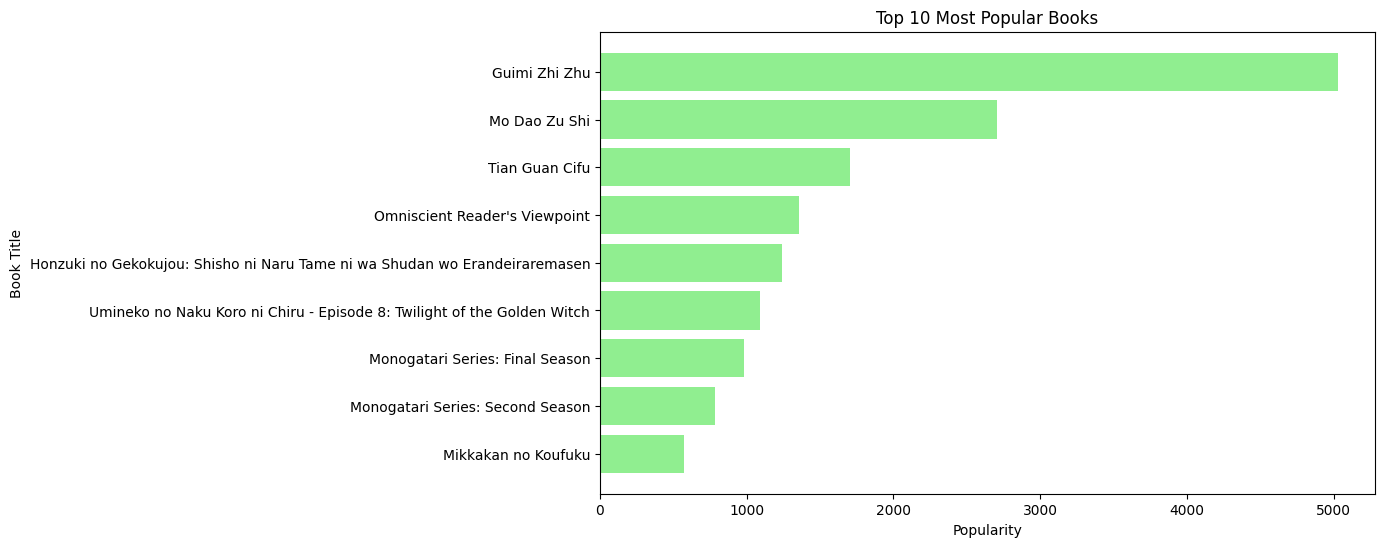

In [27]:
top_popular_books = mange2.nlargest(10, 'popularnost')

plt.figure(figsize=(10, 6))
plt.barh(top_popular_books['naslov'], top_popular_books['popularnost'], color='lightgreen')
plt.title('Top 10 Most Popular Books')
plt.xlabel('Popularity')
plt.ylabel('Book Title')
plt.gca().invert_yaxis()  # Invert y axis to have the top book on top
plt.show()

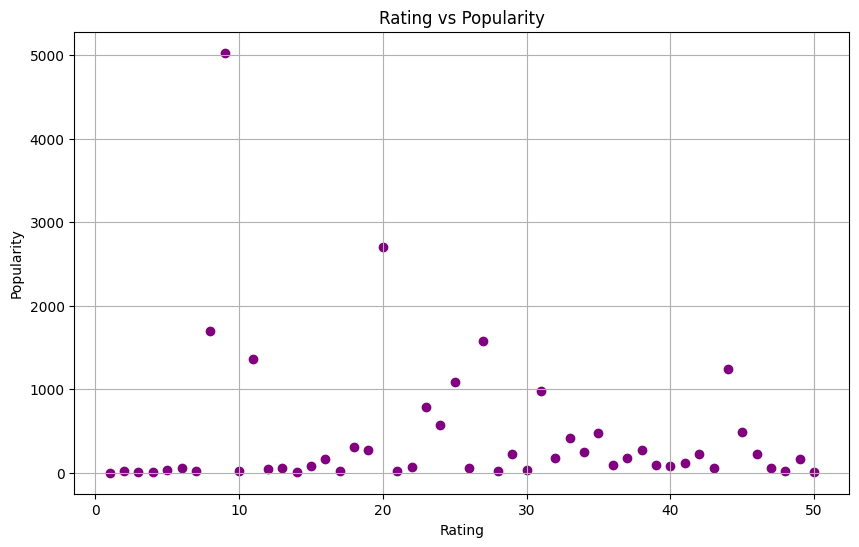

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(mange2['rank'], mange2['popularnost'], alpha=1, color='purple')
plt.title('Rating vs Popularity')
plt.xlabel('Rating')
plt.ylabel('Popularity')
plt.grid(True)
plt.show()

In [48]:
mange2.sort_values(by=['popularnost'])

,rank,naslov,ocena,deli,popularnost,seznam_zanrov,revija
1,1,Berserk,9.47,Ni končana,1,"['Action', 'Adventure', 'Award Winning', 'Dram...",Young Animal
4,4,One Piece,9.22,Ni končana,4,"['Action', 'Adventure', 'Fantasy']",Shounen Jump (Weekly)
50,50,One Punch-Man,8.73,Ni končana,7,"['Action', 'Comedy']",Tonari no Young Jump
14,14,Oyasumi Punpun,9.00,13,8,"['Drama', 'Slice of Life']",Big Comic Spirits
3,3,Vagabond,9.26,37,14,"['Action', 'Adventure', 'Award Winning']",Morning
...,...,...,...,...,...,...,...
11,11,Omniscient Reader's Viewpoint,9.03,20,1360,"['Action', 'Adventure', 'Fantasy']",Nismo našli revije
27,27,Tian Guan Cifu,8.87,Ni končana,1576,"['Action', 'Adventure', 'Boys Love', 'Drama', ...",Nismo našli revije
8,8,Tian Guan Cifu,9.08,6,1701,"['Action', 'Adventure', 'Boys Love', 'Supernat...",Nismo našli revije
20,20,Mo Dao Zu Shi,8.91,4,2703,"['Action', 'Adventure', 'Boys Love', 'Mystery'...",Nismo našli revije


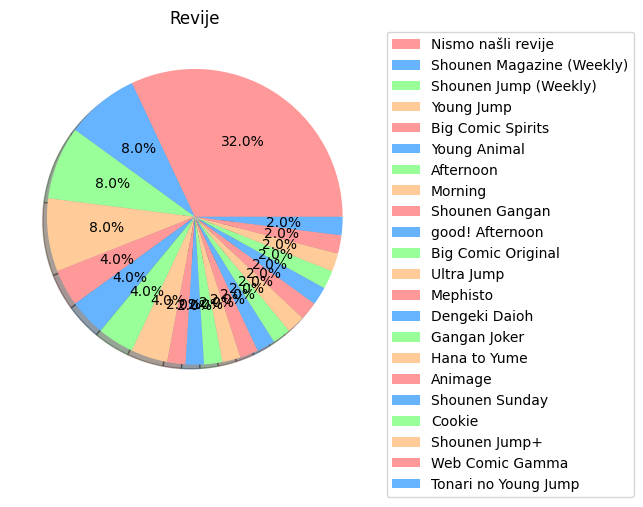

In [58]:

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
data = mange2['revija'].value_counts()
ax = data.plot(kind="pie", shadow=True, autopct='%1.1f%%', colors=colors, legend=True, title='Revije', ylabel='', labeldistance=None)
ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

#, autopct='%1.1f%%'
#plot = plt.pie(s,labels = s.index)
plt.show()